In [ ]:
# Install Watson library
#
!pip install --upgrade watson-developer-cloud

In [28]:
# Get the apikey for the Visual Recognition service instance:
# 1. From the *Services* menu in Watson Studio ( ^^ ) right-click "Watson Services" and then open the link in a new browser tab
# 2. In the new Watson services tab, click the service instance in the Visual Recognition list
# 3. In the "Credentials" tab, expand credentials and then copy the apikey
#
apikey = '' # <-- PASTE YOUR APIKEY HERE

In [29]:
# Get the ID of the trained Visual Recognition custom model:
# 1. From the *Services* menu in Watson Studio ( ^^ ) right-click "Watson Services" and then open the link in a new browser tab
# 2. In the new Watson services tab, click the service instance in the Visual Recognition list
# 3. In the "Overview" tab, scroll down to the list of your custom models and then click "Copy model ID"
#
model_id = '' # <-- PASTE YOUR MODEL ID HERE

In [30]:
# Instantiate a visual recognition object
#
from watson_developer_cloud import VisualRecognitionV3
visual_recognition = VisualRecognitionV3( version='2018-03-19', iam_apikey=apikey )

In [31]:
# Sample images for testing your trained model
#
urls = [
'https://raw.githubusercontent.com/spackows/CASCON-2018_Analyzing_images/master/water-consumption/test-data/belloday-test_01.jpg',
'https://raw.githubusercontent.com/spackows/CASCON-2018_Analyzing_images/master/water-consumption/test-data/belloday-test_02.jpg',
'https://raw.githubusercontent.com/spackows/CASCON-2018_Analyzing_images/master/water-consumption/test-data/bellonight-test_01.jpg',
'https://raw.githubusercontent.com/spackows/CASCON-2018_Analyzing_images/master/water-consumption/test-data/bellonight-test_02.jpg',
'https://raw.githubusercontent.com/spackows/CASCON-2018_Analyzing_images/master/water-consumption/test-data/donkeyday-test_01.jpg',
'https://raw.githubusercontent.com/spackows/CASCON-2018_Analyzing_images/master/water-consumption/test-data/donkeyday-test_02.jpg',
'https://raw.githubusercontent.com/spackows/CASCON-2018_Analyzing_images/master/water-consumption/test-data/donkeynight-test_01.jpg',
'https://raw.githubusercontent.com/spackows/CASCON-2018_Analyzing_images/master/water-consumption/test-data/donkeynight-test_02.jpg',
'https://raw.githubusercontent.com/spackows/CASCON-2018_Analyzing_images/master/water-consumption/test-data/ponyday-test_01.jpg',
'https://raw.githubusercontent.com/spackows/CASCON-2018_Analyzing_images/master/water-consumption/test-data/ponyday-test_02.jpg',
'https://raw.githubusercontent.com/spackows/CASCON-2018_Analyzing_images/master/water-consumption/test-data/ponynight-test_01.jpg',
'https://raw.githubusercontent.com/spackows/CASCON-2018_Analyzing_images/master/water-consumption/test-data/ponynight-test_02.jpg',
'https://raw.githubusercontent.com/spackows/CASCON-2018_Analyzing_images/master/water-consumption/test-data/shortyday-test_01.jpg',
'https://raw.githubusercontent.com/spackows/CASCON-2018_Analyzing_images/master/water-consumption/test-data/shortyday-test_02.jpg',
'https://raw.githubusercontent.com/spackows/CASCON-2018_Analyzing_images/master/water-consumption/test-data/shortynight-test_01.jpg',
'https://raw.githubusercontent.com/spackows/CASCON-2018_Analyzing_images/master/water-consumption/test-data/shortynight-test_02.jpg'
]

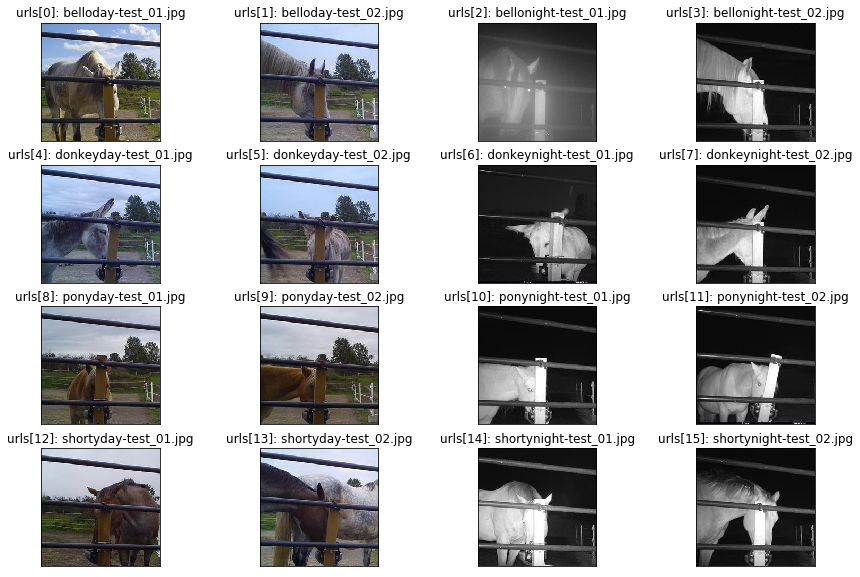

In [32]:
# View the test images
#
from skimage import io
import matplotlib.pyplot as plt
import re
fig, axs = plt.subplots( 4, 4, figsize=( 15, 10 ) )
i = 0
for axis in axs:
    for img in axis:
        url = urls[i]
        img.imshow( io.imread( url ) )
        img.set_title( 'urls[' + str(i) + ']: ' + re.sub( '.*\/', '', url ) )
        img.set_xticks([])
        img.set_yticks([])
        i = i + 1

In [33]:
# Classify the test images
#
# *Change the url parameter (urls[1], urls[2], urls[3], ...) to test the different sample images
#
import json
results = visual_recognition.classify( url=urls[0], threshold='0', classifier_ids=model_id ).get_result()
print( json.dumps( results, indent=2 ) )

{
  "images_processed": 1,
  "images": [
    {
      "classifiers": [
        {
          "name": "water-consumption",
          "classifier_id": "waterxconsumption_636103270",
          "classes": [
            {
              "score": 0.899,
              "class": "belloday"
            },
            {
              "score": 0.001,
              "class": "bellonight"
            },
            {
              "score": 0.053,
              "class": "donkeyday"
            },
            {
              "score": 0,
              "class": "donkeynight"
            },
            {
              "score": 0.048,
              "class": "ponyday"
            },
            {
              "score": 0,
              "class": "ponynight"
            },
            {
              "score": 0.021,
              "class": "shortyday"
            },
            {
              "score": 0,
              "class": "shortynight"
            }
          ]
        }
      ],
      "resolved_url": "https